In [1]:
%matplotlib inline
import os
import sys
import pylab as plt
import numpy as np
from glob import glob
import fitsio
from collections import Counter

In [2]:
from astrometry.util.fits import *
from astrometry.util.util import *
from astrometry.libkd.spherematch import match_radec
from tractor import *
from astrometry.util.starutil_numpy import *

In [3]:
sys.path.append('legacypipe/py')

In [4]:
from legacypipe.format_catalog import get_units_for_columns

In [5]:
G = fits_table('/global/cscratch1/sd/dstn/gaia-mask-dr9.fits')

In [6]:
Counter(G.isgalaxy)

Counter({0: 33941026})

In [7]:
G.delete_column('isgalaxy')

In [8]:
np.sum(G.jmag != 0), np.sum(G.hmag != 0), np.sum(G.kmag != 0)

(14239, 14239, 14239)

In [9]:
G.delete_column('jmag')
G.delete_column('hmag')
G.delete_column('kmag')

In [10]:
np.nanmin(G.zguess), np.nanmax(G.zguess)

(-0.74399996, 20.254179)

In [11]:
np.sum(np.isfinite(G.zguess))

33931531

In [12]:
Counter(G.ref_cat)

Counter({'G2': 33926787, 'T2': 14239})

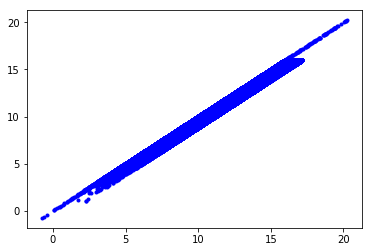

In [13]:
plt.plot(G.mag, G.mask_mag, 'b.');

In [14]:
Counter(G.istycho)

Counter({False: 32378395, True: 1562631})

In [15]:
Counter(G.ismedium)

Counter({True: 33940936, False: 90})

In [16]:
Counter(G.isbright)

Counter({True: 3984360, False: 29956666})

In [17]:
Counter(G.donotfit)

Counter({False: 33938933, True: 2093})

In [18]:
Counter(G.source_id == G.ref_id)

Counter({True: 33926787, False: 14239})

In [19]:
Counter(G.istycho * np.logical_not(G.isgaia))

Counter({False: 33926787, True: 14239})

In [20]:
G.delete_column('source_id')

In [21]:
Counter(G.duplicated_source)

Counter({False: 31347744, True: 2593282})

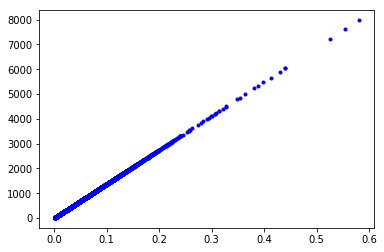

In [22]:
plt.plot(G.radius, G.radius_pix, 'b.');

In [23]:
Counter(G.in_bounds)

Counter({True: 33941026})

In [24]:
Counter(G.islargegalaxy)

Counter({False: 33941026})

In [25]:
Counter(G.iscluster)

Counter({False: 33941026})

In [26]:
Counter(G.freezeparams)

Counter({False: 33941026})

In [27]:
Counter(G.pa == 0.)

Counter({True: 33941026})

In [28]:
Counter(G.ba == 0.)

Counter({True: 33941026})

In [29]:
for c in ['in_bounds', 'islargegalaxy', 'iscluster', 'freezeparams', 'pa', 'ba']:
    G.delete_column(c)

In [30]:
G.delete_column('keep_radius')

In [31]:
gaiacols = ['phot_g_mean_mag', 'phot_g_mean_flux_over_error', 'phot_g_n_obs', 'phot_bp_mean_mag', 'phot_bp_mean_flux_over_error',
          'phot_bp_n_obs', 'phot_rp_mean_mag', 'phot_rp_mean_flux_over_error', 'phot_rp_n_obs', 'phot_variable_flag',
          'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_n_obs_al', 'astrometric_n_good_obs_al',
          'astrometric_weight_al', 'duplicated_source', 'a_g_val', 'e_bp_min_rp_val', 'phot_bp_rp_excess_factor',
          'astrometric_sigma5d_max', 'astrometric_params_solved']
for c in gaiacols:
    G.rename(c, 'gaia_'+c)

In [32]:
# Column ordering
cols = ('ra dec ref_cat ref_id ref_epoch mag mask_mag radius radius_pix '
        + 'pmra pmdec parallax ra_ivar dec_ivar pmra_ivar pmdec_ivar parallax_ivar '
        + 'istycho isgaia isbright ismedium pointsource donotfit '
        + 'decam_mag_g decam_mag_r decam_mag_z zguess '
        + 'brickname ibx iby').split()
cols += ['gaia_'+c for c in gaiacols]

In [33]:
units = get_units_for_columns(cols, '', extras=dict(radius='deg'))

In [34]:
#G.writeto('/global/cscratch1/sd/dstn/gaia-mask-dr9-fixed.fits', columns=cols, units=units)

In [35]:
sys.path.append('desimodel/py')
sys.path.append('desiutil/py')

In [36]:
os.environ['DESIMODEL'] = 'desimodel-data/0.13.1'

In [37]:
from desimodel.footprint import is_point_in_desi
from desimodel.io import load_tiles

In [38]:
desitiles = load_tiles()

In [39]:
G.in_desi = is_point_in_desi(desitiles, G.ra, G.dec)

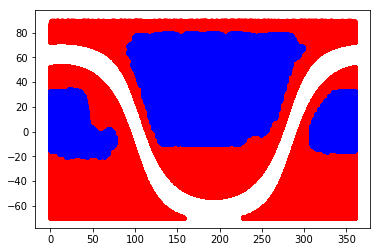

In [40]:
plt.plot(G.ra, G.dec, 'r.')
plt.plot(G.ra[G.in_desi], G.dec[G.in_desi], 'b.');

In [41]:
cols = ('ra dec ref_cat ref_id ref_epoch mag mask_mag radius radius_pix '
        + 'pmra pmdec parallax ra_ivar dec_ivar pmra_ivar pmdec_ivar parallax_ivar '
        + 'in_desi '
        + 'istycho isgaia isbright ismedium pointsource donotfit '
        + 'decam_mag_g decam_mag_r decam_mag_z zguess '
        + 'brickname ibx iby').split()
cols += ['gaia_'+c for c in gaiacols]
units = get_units_for_columns(cols, '', extras=dict(radius='deg'))
G.writeto('/global/cscratch1/sd/dstn/gaia-mask-dr9-fixed.fits', columns=cols, units=units)